# iPython notebook - SS analysis - User groups
Google Analytics data


## 1. Import libraries

In [18]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options


In [19]:
URL = "tmrw.co" # User-entered website


 2. Settings

In [20]:
# Time period 17th Jan - 16th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4
 

In [21]:
# open file. It is requested via API explorer using request parameters:

#Account: TMRW Tech Hub
#Property: TMRW
#View: All Web Site Data
#ids: ga:123303369
#start-date: 2017-01-15
#end-date: yesterday

#metrics
#ga:sessions
#ga:percentNewSessions
#ga:bounceRate
#ga:pageviewsPerSession
#ga:avgSessionDuration
#ga:goal1ConversionRate
#ga:goal1Completions

#dimensions
#ga:city
#ga:userAgeBracket

#sort
#ga:goal1ConversionRate




Skipped step:
Check statistical validity 
Filter off spam traffic and own dev/marketing IPs




Algorithm of actions:



1. Determine buckets

### Are there lines that can be grouped by each metric:
Bounce Rate	
Avg. Session Duration	
Goal 1 Completions	
Goal 1 Conversion Rate	
Pages / Session



### Acceptable spread = 10%


Take Key_metrics and check volume of traffic and conversions. Which is the most extreme?
Conversion bucket = new array 
TMRW_users_city.max=TMRW_users_city.max()

2. Define key metrics
Key_metrics = location/age. Can be location/gender or age/gender also. For them other API call needs to be made.

3. Open file

4. Visualise

In [22]:
# Open file
TMRW_users= pd.read_csv("files/TMRW_geo_loc_API.csv")
#TMRW_users[TMRW_users.Age=='55-64']
TMRW_users

,City,Age,% New Sessions,Sessions,Bounce Rate,Avg. Session Duration,Goal 1 Completions,Goal 1 Conversion Rate,Pages / Session
0,(not set),35-44,43.750,16,62.500,53.500,0,0.000,1.688
1,London,55-64,77.778,36,47.222,92.472,0,0.000,2.333
2,London,45-54,70.909,165,53.939,135.079,2,1.212,1.915
3,Croydon,45-54,65.854,82,48.780,167.707,1,1.220,2.049
4,London,35-44,69.014,426,53.756,119.549,12,2.817,1.962
5,London,25-34,66.623,758,59.235,103.788,22,2.902,1.856
6,Croydon,35-44,64.216,204,43.137,158.848,6,2.941,2.284
7,Croydon,55-64,74.194,31,51.613,62.323,1,3.226,1.677
8,Croydon,18-24,69.767,86,43.023,101.384,3,3.488,2.140
9,(not set),25-34,75.000,24,62.500,75.542,1,4.167,1.583


In [23]:
# rename columns
TMRW_users.columns=['city','age', 'new_sessions','sessions','bounce_rate','asd','goal1','goal1CR','PPS'] 
TMRW_users=TMRW_users.sort_values('goal1CR')

TMRW_users_filter = TMRW_users[TMRW_users.sessions > 80]
TMRW_users_filter

,city,age,new_sessions,sessions,bounce_rate,asd,goal1,goal1CR,PPS
2,London,45-54,70.909,165,53.939,135.079,2,1.212,1.915
3,Croydon,45-54,65.854,82,48.780,167.707,1,1.220,2.049
4,London,35-44,69.014,426,53.756,119.549,12,2.817,1.962
5,London,25-34,66.623,758,59.235,103.788,22,2.902,1.856
6,Croydon,35-44,64.216,204,43.137,158.848,6,2.941,2.284
8,Croydon,18-24,69.767,86,43.023,101.384,3,3.488,2.140
10,Croydon,25-34,58.194,299,47.157,198.344,15,5.017,2.261
11,London,18-24,75.484,155,51.613,172.226,8,5.161,2.187


In [24]:
TMRW_users_filter.describe()
# will need to convert dnumbers into tim
#TMRW_users_filter_new =pd.to_datetime(TMRW_users_filter['asd'], format='%H:%M')


,new_sessions,sessions,bounce_rate,asd,goal1,goal1CR,PPS
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,67.507625,271.875000,50.080000,144.615625,8.62500,3.094750,2.081750
std,5.122239,227.124533,5.641801,35.132391,7.28869,1.479211,0.161107
min,58.194000,82.000000,43.023000,101.384000,1.00000,1.212000,1.856000
25%,65.444500,137.750000,46.152000,115.608750,2.75000,2.417750,1.950250
50%,67.818500,184.500000,50.196500,146.963500,7.00000,2.921500,2.094500
75%,70.052500,330.750000,53.801750,168.836750,12.75000,3.870250,2.205500
max,75.484000,758.000000,59.235000,198.344000,22.00000,5.161000,2.284000


In [25]:
# Check if the number of sessions is enough for analysis

if TMRW_users.sessions.sum() < 80:
    print("Error")

#if sessions are too small remove
#if one conversion - remove

# 1. Too small sessions
TMRW_users.describe().loc['mean', 'sessions']


164.85714285714286

In [26]:
#algo for bucketing into varios secsions: 

#buckets by goal1CR

TMRW_users_goal1CR = TMRW_users_filter.nlargest(3, 'goal1CR')
TMRW_users_goal1CR_gCity = TMRW_users_goal1CR.groupby(['city']).mean() #this is not too correct- average of proportion, but ok for now
TMRW_users_goal1CR_gAge = TMRW_users_goal1CR.groupby(['age']).mean() 
TMRW_users_goal1CR_gCity

,new_sessions,sessions,bounce_rate,asd,goal1,goal1CR,PPS
city,,,,,,,
Croydon,63.9805,192.5,45.090,149.864,9.0,4.2525,2.2005
London,75.4840,155.0,51.613,172.226,8.0,5.1610,2.1870


In [38]:
TMRW_users_goal1CR.loc[11,'age']

'18-24'

In [28]:
TMRW_users_goal1CR_gAge.loc[: , 'goal1']

age
18-24     5.5
25-34    15.0
Name: goal1, dtype: float64

In [35]:
TMRW_users_goal1CR.loc[]
'age'.max

,city,age,new_sessions,sessions,bounce_rate,asd,goal1,goal1CR,PPS
11,London,18-24,75.484,155,51.613,172.226,8,5.161,2.187
10,Croydon,25-34,58.194,299,47.157,198.344,15,5.017,2.261
8,Croydon,18-24,69.767,86,43.023,101.384,3,3.488,2.140


In [30]:
# The most converting audience
print(+" is most converting Demographic category")

#x = TMRW_users_goal1CR_gAge.index

y = TMRW_users_goal1CR.[: , 'goal1CR']

plt.hist(y)

plt.title("Top converting buckets")
plt.xlabel("Conv rate")
plt.ylabel("Frequency")


plt.show()

TypeError: bad operand type for unary +: 'str'

In [31]:
TMRW_users_bounce_rate = TMRW_users_filter.nlargest(3, 'bounce_rate')
TMRW_users_bounce_rate
#if the_largest traffic source = ('not_set') then output error ''

,city,age,new_sessions,sessions,bounce_rate,asd,goal1,goal1CR,PPS
5,London,25-34,66.623,758,59.235,103.788,22,2.902,1.856
2,London,45-54,70.909,165,53.939,135.079,2,1.212,1.915
4,London,35-44,69.014,426,53.756,119.549,12,2.817,1.962


In [70]:
TMRW_users_PPS = TMRW_users_filter.nlargest(3, 'PPS')
TMRW_users_PPS

,city,age,new_sessions,sessions,bounce_rate,asd,goal1,goal1CR,PPS
6,Croydon,35-44,64.216,204,43.137,158.848,6,2.941,2.284
10,Croydon,25-34,58.194,299,47.157,198.344,15,5.017,2.261
11,London,18-24,75.484,155,51.613,172.226,8,5.161,2.187


In [10]:
TMRW_users_agcities=TMRW_users.groupby(["city"]).sum()
TMRW_users_agcities


,new_sessions,sessions,bounce_rate,asd,goal1,goal1CR,PPS
city,,,,,,,
(not set),118.750,40,125.000,129.042,1,4.167,3.271
Croydon,332.225,702,233.710,688.606,26,15.892,10.411
Hove,75.000,12,16.667,69.417,1,8.333,2.167
London,445.522,1554,337.194,739.971,45,19.235,11.539


In [10]:
selected=TMRW_users_agcities.loc[:,'Goal 1 Completions']
selected

City
(not set)     1
Croydon      26
Hove          1
London       45
Name: Goal 1 Completions, dtype: int64

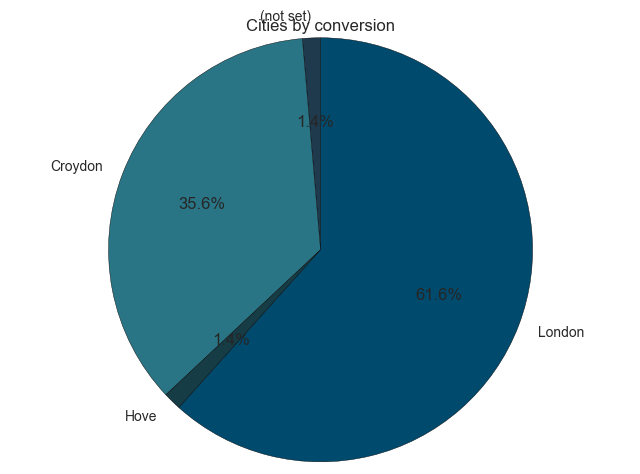

In [16]:
labels = selected.index
sizes = selected
# colours are taken from http://tools.medialab.sciences-po.fr/iwanthue/
colors = ['#1f394d','#2a7585', '#163c45', '#004a6e']
explode = (0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('Cities by conversion')
plt.show()

# Conversion traffic

In [11]:
# Generate text
print (" segment converts best")

 segment converts best


# Mobile analytics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input_mob = pd.read_csv('files/TMRW_mob.csv')
input_mob.columns=['device','sessions','%news', 'new_users','bounce_rate','PPS', 'ASD', 'goal1CR','goal1']
input_mob = input_mob.set_index('device')

def p2f(x):
    return float(x.strip('%'))/100

input_mob

,sessions,%news,new_users,bounce_rate,PPS,ASD,goal1CR,goal1
device,,,,,,,,
desktop,2976,70.93%,"2,111",53.36%,2.01,00:02:19,3.76%,112
mobile,1502,70.51%,"1,059",60.19%,1.83,00:01:35,1.73%,26
tablet,171,73.10%,125,56.73%,1.74,00:01:33,1.75%,3


In [121]:
conv_increase =  float(input_mob.loc['mobile','sessions']) * p2f(input_mob.loc['desktop','goal1CR']) - float(input_mob.loc['mobile','goal1']) 
conv_increase=int(conv_increase)

Have 30 more conversions per month by optmiising mobile UX


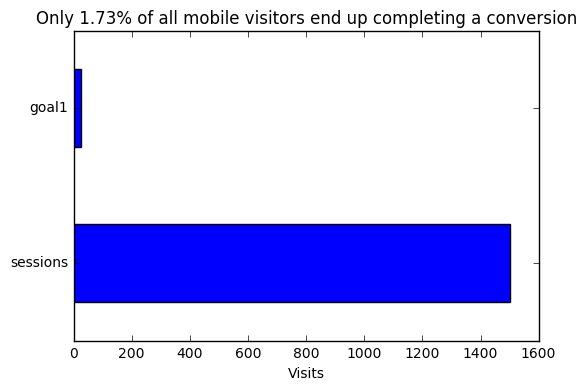

In [157]:
# Check if data is valid

is_valid = True
output_chart_data = input_mob.loc['mobile',['sessions','goal1']]

# convert percentages into float



mob_CR =  p2f(input_mob.loc['desktop','goal1CR'])
desk_CR = p2f(input_mob.loc['mobile','goal1CR'])

def funnel_cart():
    return 

# calculate difference

mob_dif = mob_CR / desk_CR

# if mobile goal1CR is less by more than 20% then reult is failed 

if mob_dif > 1.5:
    #funnel_chart()
    output_chart_data

    
else:
       is_valid = False
    

# if not then build chart

# http://stackoverflow.com/questions/21397549/stack-bar-plot-in-matplotlib-and-add-label-to-each-section-and-suggestions
# http://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots

#mob_chart = output_chart_data
x = {1}
y = {100,10}
     

#ou = pd.DataFrame([100,10], columns=['sessions', 'goal1'])

output_chart_data.plot.barh(stacked=True)
#plt.barh(x,y,'stacked')

mob_conv = input_mob.loc['mobile','goal1CR']


plt.xlabel('Visits')
plt.title('Only %s of all mobile visitors end up completing a conversion' % mob_conv)

#need to specify analytics time perdiod
print("Have %s more conversions per month by optmiising mobile UX" % conv_increase)


plt.show()